# Leukemia  Classification Using Machine Learning

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image
from tqdm.auto import tqdm

In [ ]:
!pip install open_clip_torch

## Load data and model

In [ ]:
data_dir = "Dataset/Original"

def load_data(data_dir):
    data = []
    labels = []
    for label in os.listdir(data_dir):
        for img_name in os.listdir(os.path.join(data_dir, label)):
            img = Image.open(os.path.join(data_dir, label, img_name))
            data.append(img)
            labels.append(label)
    return data, labels

images, labels = load_data(data_dir)

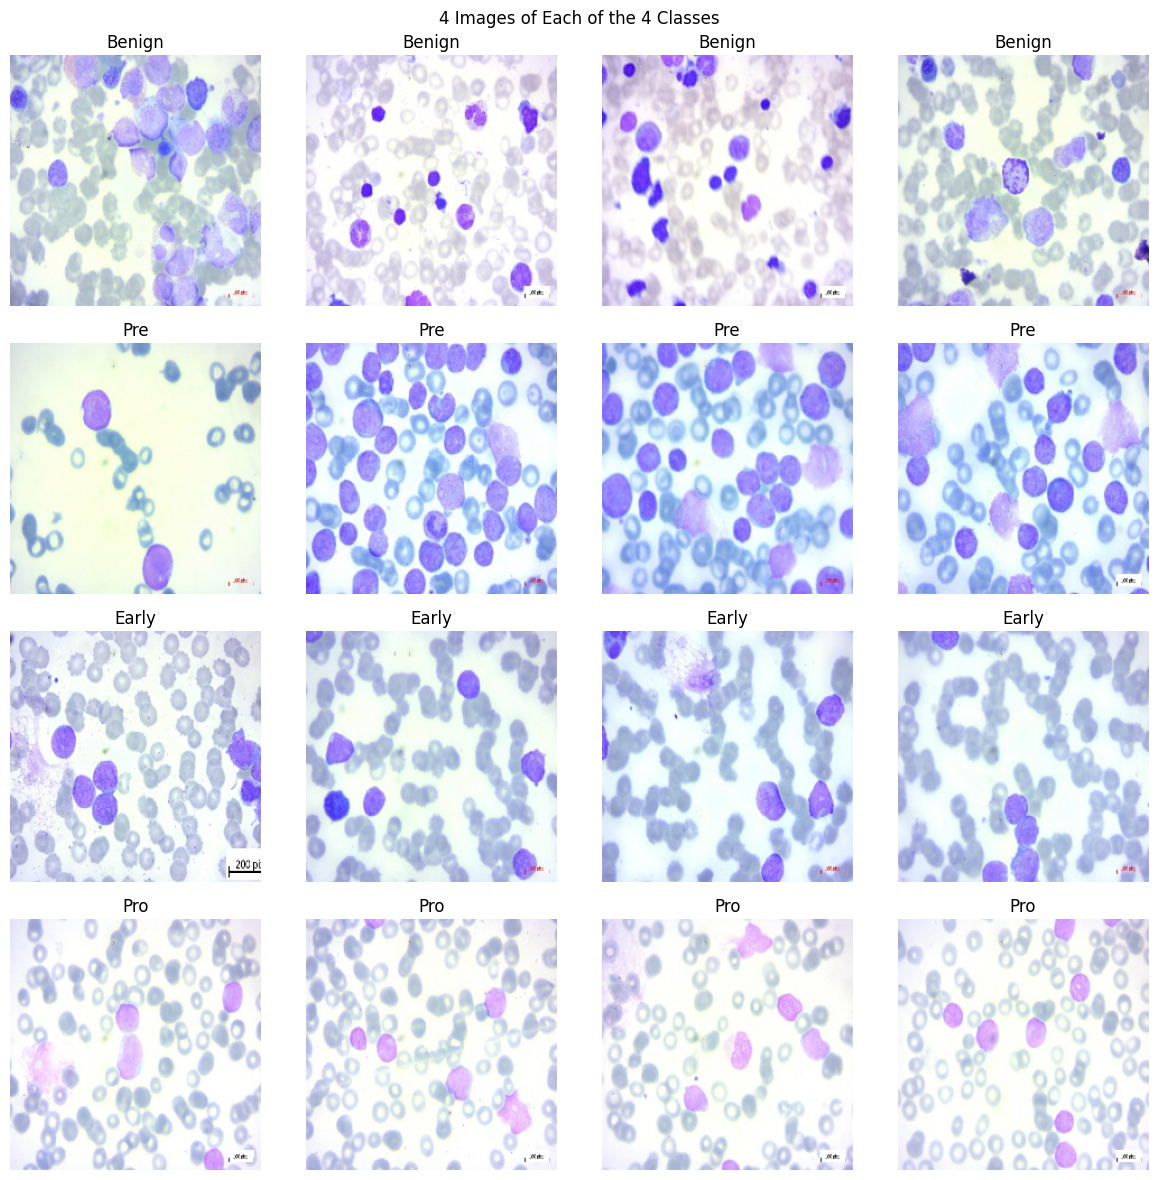

In [ ]:
label_to_images = {}
for img, label in zip(images, labels):
    if label not in label_to_images:
        label_to_images[label] = []
    label_to_images[label].append(img)

# Visualize 4 images of each of the 4 classes
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
fig.suptitle('4 Images of Each of the 4 Classes')

for i, (label, imgs) in enumerate(label_to_images.items()):
    for j in range(4):
        axes[i, j].imshow(imgs[j])
        axes[i, j].set_title(label)
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(labels)
np.unique(y)

array([0, 1, 2, 3])

In [5]:
%%capture
from open_clip import create_model_from_pretrained

# Load the model and config files from the Hugging Face Hub
model, preprocess = create_model_from_pretrained('hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224')
model.eval()

## Obtain BioMedCLIP embeddings

In [6]:
# make a batch of images
batch_size = 4
images_batched = [images[i:i + batch_size] for i in range(0, len(images), batch_size)]

def extract_features(images_batched):
    features = []

    with torch.no_grad():
        for image_batch in tqdm(images_batched, desc='Extracting features'):
            inputs = torch.stack([preprocess(img) for img in image_batch])
            outputs = model.encode_image(inputs)
            features.append(outputs)
            
    return torch.cat(features).cpu().numpy()

# Extract features from the images
features = extract_features(images_batched)
np.save('embeddings.npy', features)

In [4]:
features.shape

(3256, 512)